# Task 1 - Exploratory Data Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

---

## Section 2 - Data loading


In [ ]:
path = "/content/drive/MyDrive/cogniznt/Task1/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics
- mean
- median
- count
- etc...

In [ ]:
# total columns in data
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [ ]:
# Data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
# Descriptive statistics of each attribute
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:
# Total null values in data
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

---

## Section 4 - Visualisation


In [ ]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  # Select only numeric columns for correlation calculation
  numeric_data = data.select_dtypes(include=['number'])
  corr = numeric_data.corr()
  return corr.style.background_gradient(cmap='coolwarm')
  # corr = df.corr()
  # corr.style.background_gradient(cmap='coolwarm')

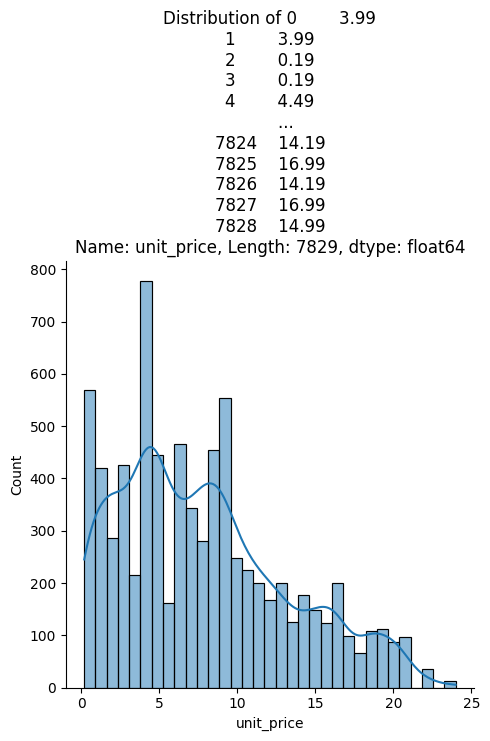

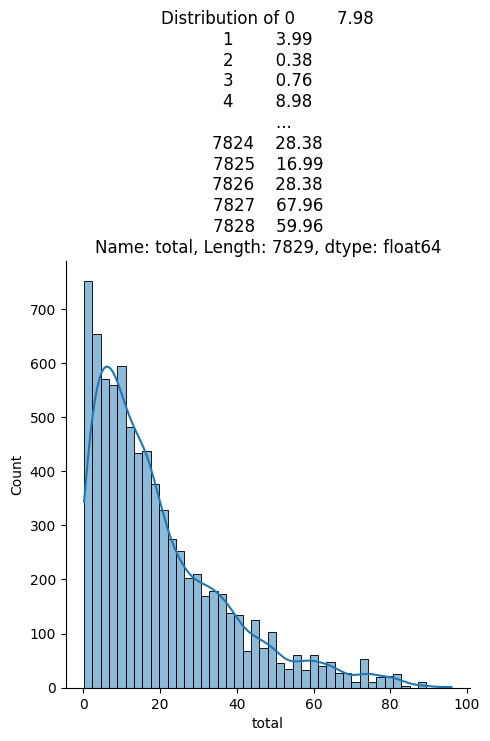

In [ ]:
plot_continuous_distribution(df,df.unit_price,5) # avg price between 0-15
# plot_continuous_distribution(df,df.quantity,5)
plot_continuous_distribution(df,df.total,5) # avg money spent by customer is 0-30

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract hour and minute
df['time'] = df['timestamp'].dt.strftime('%H:%M')

# Find the most common time
most_common_time = df['time'].mode()[0]

print("The most common time is:", most_common_time)

The most common time is: 09:59


In [ ]:
get_unique_values(data=df,column="category") # Totla 22 categories
get_unique_values(data=df,column="customer_type") # 5 customer types
get_unique_values(data=df,column="payment_type")
get_unique_values(data=df,column="product_id") # 300 unique products

Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64
Column: customer_type has 5 unique values

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64
Column: payment_type has 4 unique values

payment_type
cash           2027
credit card    1949
e-wallet       

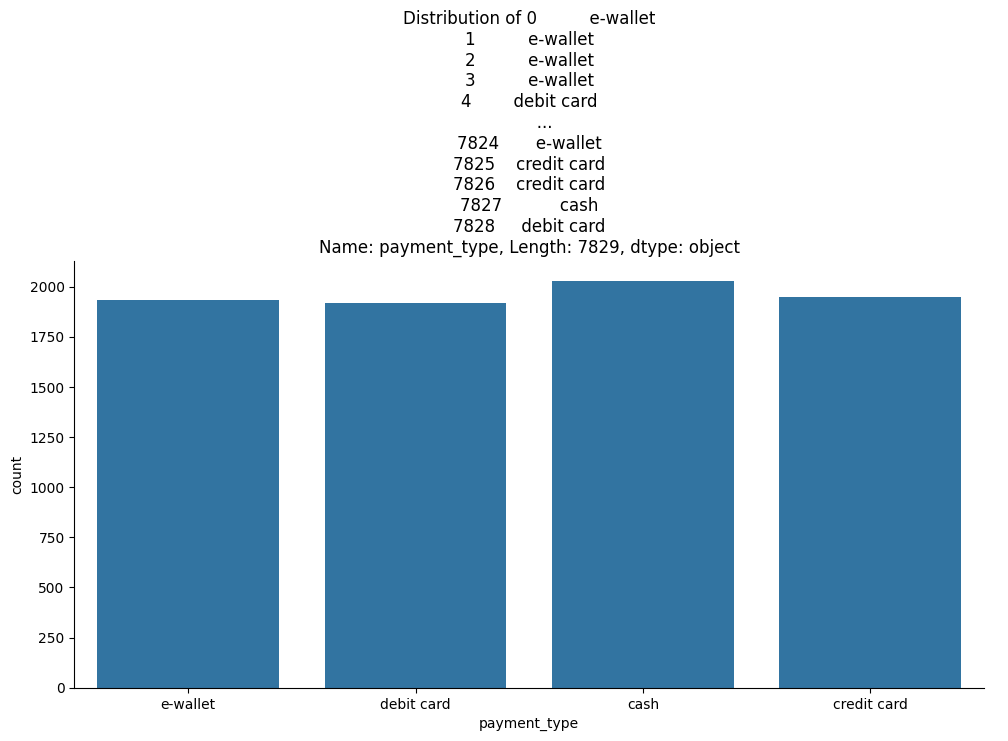

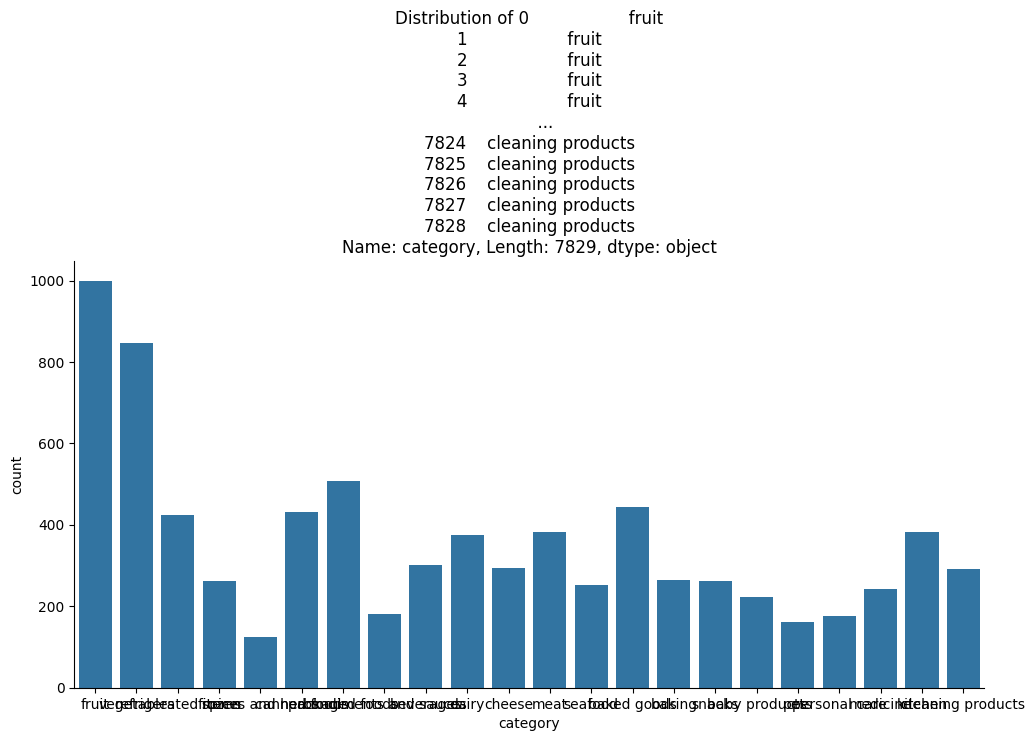

In [ ]:
plot_categorical_distribution(df,df.payment_type,5)
plot_categorical_distribution(df,df.category,5)

[Text(0.5, 1.0, 'Distribution of Category')]

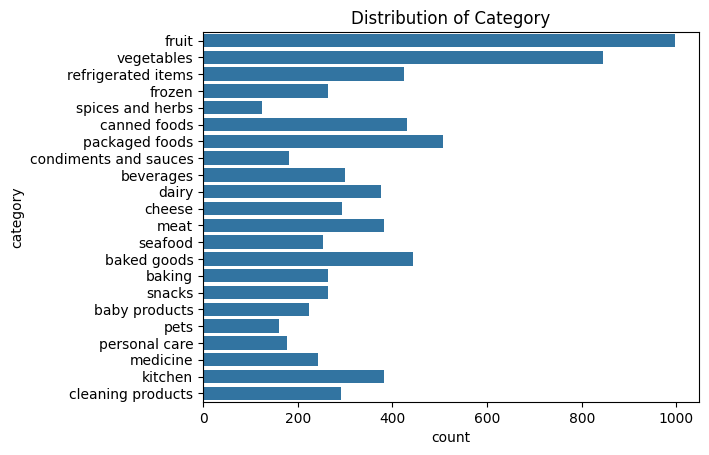

In [ ]:
sns.countplot(df.category).set(title=f'Distribution of Category') # total product type in each category

In [ ]:
correlation_plot(df)

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


In [ ]:
import matplotlib.pyplot as plt

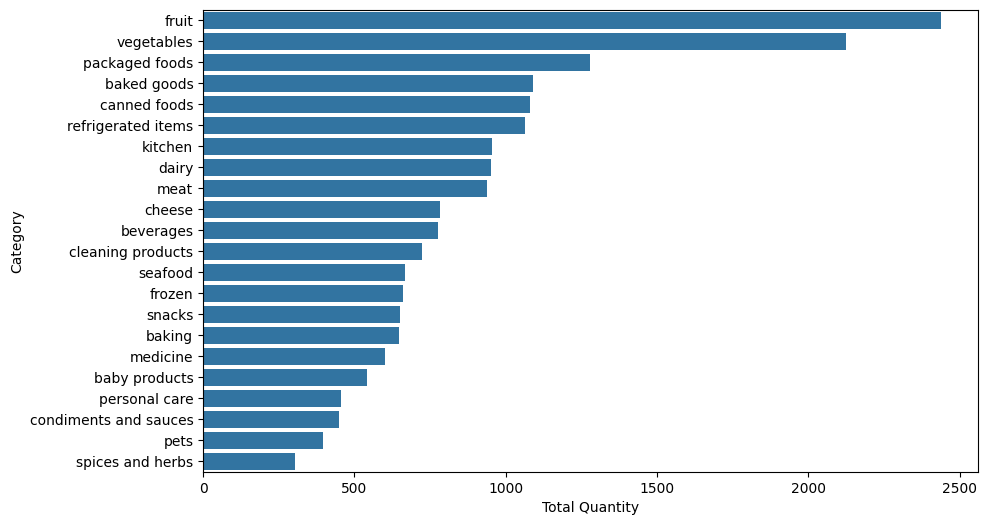

In [ ]:
# Total products in each category
category_quantity = df.groupby('category')['quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(category_quantity.sort_values(by='quantity', ascending=False), x='quantity', y='category')
plt.xlabel('Total Quantity')
plt.ylabel('Category')
plt.show()

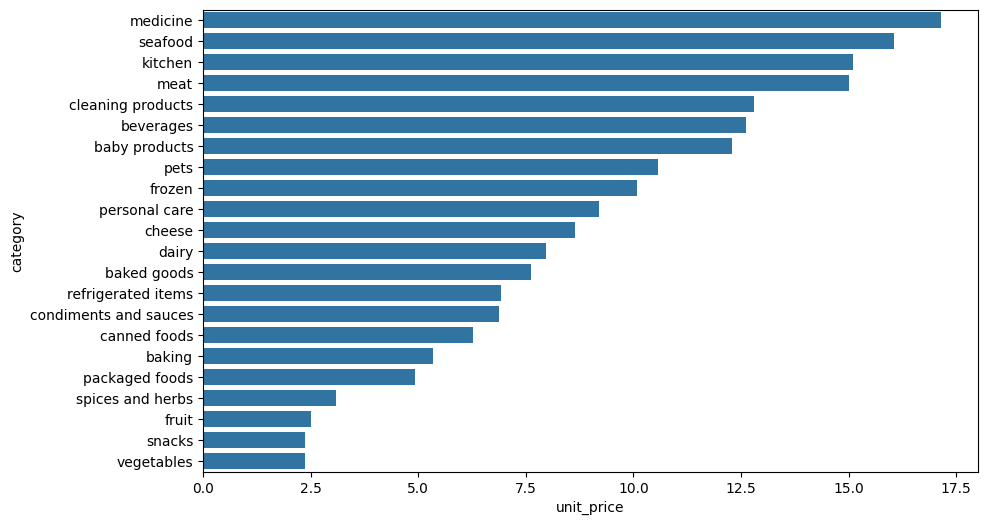

In [ ]:
# Calculate total unit price for each category
category_unit_price = df.groupby('category')['unit_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(category_unit_price.sort_values(by='unit_price', ascending=False), x='unit_price', y='category')
plt.show()

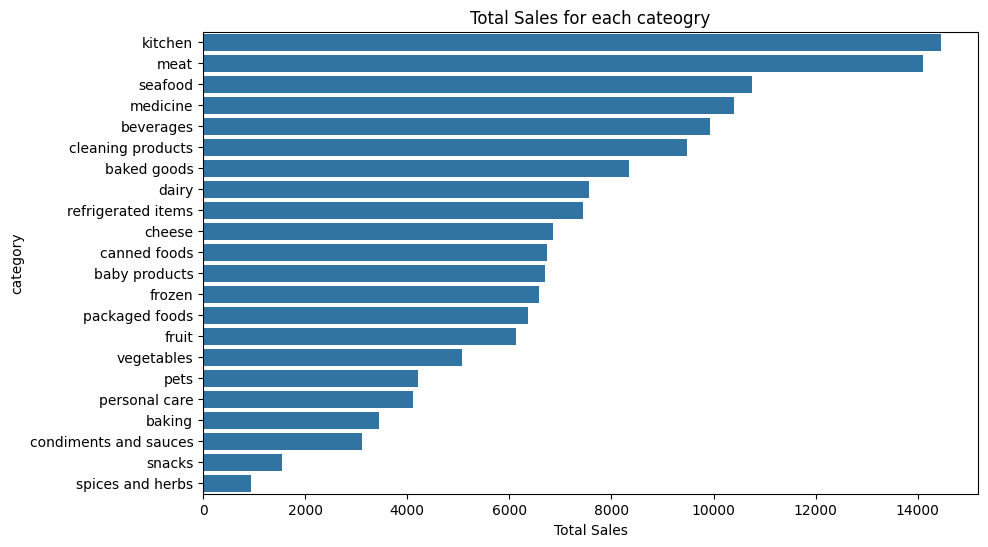

In [ ]:
# Total sales based on each category
category_sales = df.groupby('category')['total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales.sort_values(by='total', ascending=False), x='total', y='category')
plt.xlabel("Total Sales")
plt.title("Total Sales for each cateogry")
plt.show()

In [ ]:
# percentage of payment_type
for i in df['payment_type'].unique():
  print('percentage of',i,'in total values is',round((df['payment_type'].value_counts()[i] / len(df['payment_type'])),2)*100,'%')

percentage of e-wallet in total values is 25.0 %
percentage of debit card in total values is 24.0 %
percentage of cash in total values is 26.0 %
percentage of credit card in total values is 25.0 %


Conclusion:
From the above charts we can conclude that
- Fruits,vegetables and packaged foods occupy major quantity
- But the sales is very low for them
- so high sales categories like kitchen, meat and seafood quantity can be increased.
- since unit price is directly correlated to sales,  quantity of categories with high unit price can also be increased.